In [2]:
import datetime
import math
import numpy as np
from datetime import timedelta
from scipy.interpolate import interp1d

# current date 2020.06.15

dtFormat = "%Y-%m-%dT%H:%M:%S"
sunSetAt = datetime.datetime.strptime("2020-06-15T21:19:00", dtFormat)
sunRiseAt = datetime.datetime.strptime("2020-06-15T21:19:00", dtFormat)
astroTwiStartAt = datetime.datetime.strptime("2020-06-15T23:30:00", dtFormat)
astroTwiEndAt = datetime.datetime.strptime("2020-06-16T02:30:00", dtFormat)

noonAt = datetime.datetime.strptime("2020-06-16T12:00:00", dtFormat)


# https://en.wikipedia.org/wiki/Sigmoid_function
def sigmoid(x):
    return 1 / (1 + math.pow(math.e, (x * -1)))


# https://en.wikipedia.org/wiki/Generalised_logistic_function
def gen_logistic_curve(t):
    a = 0
    b = 0.7
    k = 1.0
    q = 0.5
    v = 0.5
    m = 0
    c = 1
    return a + ((k - a) / (math.pow(c + q * (math.pow(math.e, (b * t) * -1)), (1 / v))))


def timedelta_to_range(t1, t2, now):
    curve_zone_start = -6
    curve_zone_end = 6
    polate = interp1d([t1, t2], [curve_zone_start, curve_zone_end])
    return polate(now)


def brightness_to_settings(brightness):
    min_shutter_speed = 15
    max_shutter_speed = 1/8000
    min_iso = 1600
    max_iso = 100
    aperture = 2.8
    shutter_polate = interp1d([0, 1], [min_shutter_speed, max_shutter_speed])
    iso_polate = interp1d([0, 1], [min_iso, max_iso])
    return shutter_polate(brightness), iso_polate(brightness)


now = datetime.datetime.strptime("2020-06-15T23:30:00", dtFormat)

np_time = np.array([])
np_brightness = np.array([])
np_shutter_speed = np.array([])
np_iso = np.array([])

for i in range(0, 13):
    t = (now + timedelta(hours=i))
    mapped = timedelta_to_range(astroTwiStartAt.timestamp(), noonAt.timestamp(), t.timestamp())
    brightness = gen_logistic_curve(mapped)
    settings = brightness_to_settings(brightness)
    
    np_time = np.append(np_time, [t.strftime("%Y-%m-%dT%H:%M:%S")])
    np_brightness = np.append(np_brightness, [brightness])
    np_shutter_speed = np.append(np_shutter_speed, [settings[0]])
    np_iso = np.append(np_iso, [settings[1]])

2020-06-15T23:30:00,0.0008478506432792244,14.987282346332142,1598.7282240350812
2020-06-16T00:30:00,0.0030768761195553627,14.953847242816185,1595.3846858206668
2020-06-16T01:30:00,0.010637089999535724,14.840444979643214,1584.0443650006964
2020-06-16T02:30:00,0.03378014562423055,14.493302038154745,1549.3297815636543
2020-06-16T03:30:00,0.09364042403514843,13.595405344525778,1459.5393639472773
2020-06-16T04:30:00,0.21469566171671411,11.779591911207003,1277.9565074249288
2020-06-16T05:30:00,0.3948244255633238,9.077682969603337,1007.7633616550143
2020-06-16T06:30:00,0.5898499495536272,6.1523244879392855,715.2250756695591
2020-06-16T07:30:00,0.7505789016022312,3.7414102983292334,474.13164759665324
2020-06-16T08:30:00,0.8592854658203165,2.110825423378481,311.07180126952517
2020-06-16T09:30:00,0.9241477596766875,1.137899123319647,213.77836048496874
2020-06-16T10:30:00,0.9601428399236835,0.5979774189997382,159.78574011447472
2020-06-16T11:30:00,0.9793417870493857,0.30999561198259684,130.987319

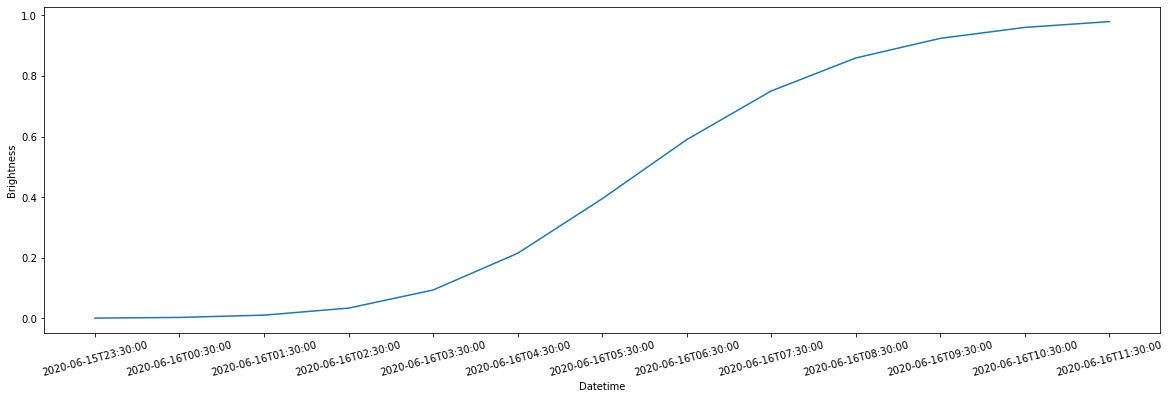

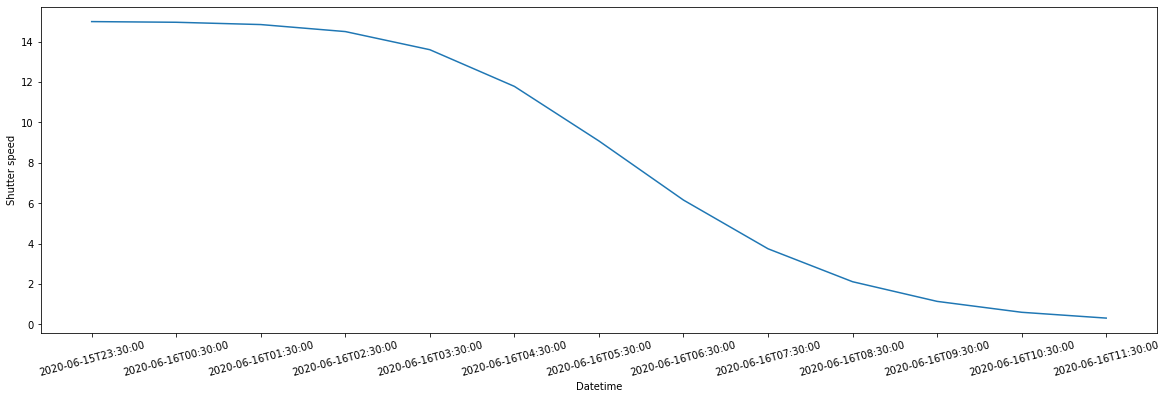

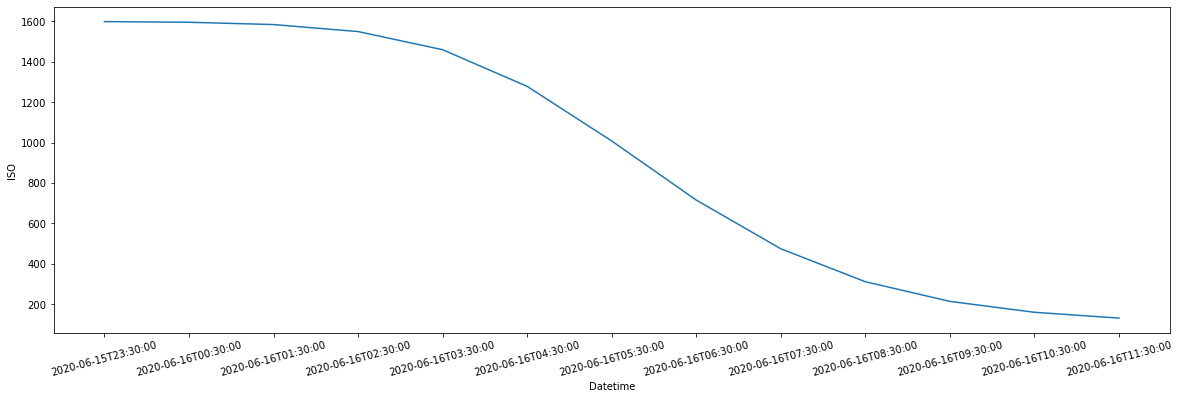

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def show_plot(x, y, y_label):
    plt.rcParams["figure.figsize"] = (20,6)
    plt.xticks(rotation=15)
    plt.xlabel("Datetime")
    plt.ylabel(y_label)
    plt.plot(x, y)
    plt.show()

show_plot(np_time, np_brightness, "Brightness")
show_plot(np_time, np_shutter_speed, "Shutter speed")
show_plot(np_time, np_iso, "ISO")